# Series de tiempo



In [3]:
import numpy as np 
import pandas as pd
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt

Algunas veces la teoría clásica de series de tiempo le gana a las redes neuronales, por lo que usualmente lo mejor es aplicar teoría clásica y a los resultados de la teoría clásica aplicarles redes neuronales.

In [4]:
!ls

TimeSeries_1.ipynb	       archive	faces	models
TimeSeries_H1Visualizar.ipynb  data	images	mydata


In [5]:
df = pd.read_csv('/notebooks/storage/mydata/daily-min-temperatures.csv'); df

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


In [6]:
df = pd.read_csv('/notebooks/storage/mydata/daily-min-temperatures.csv', index_col='Date')

In [7]:
df.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [8]:
df.index

Index(['1981-01-01', '1981-01-02', '1981-01-03', '1981-01-04', '1981-01-05',
       '1981-01-06', '1981-01-07', '1981-01-08', '1981-01-09', '1981-01-10',
       ...
       '1990-12-22', '1990-12-23', '1990-12-24', '1990-12-25', '1990-12-26',
       '1990-12-27', '1990-12-28', '1990-12-29', '1990-12-30', '1990-12-31'],
      dtype='object', name='Date', length=3650)

Dado que no esta tomando las fechas con un formato de fecha, volvemos a cargar y parseamos por fecha. 

In [9]:
df = pd.read_csv('/notebooks/storage/mydata/daily-min-temperatures.csv', index_col='Date', parse_dates=True)

In [10]:
df.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [11]:
df.index

DatetimeIndex(['1981-01-01', '1981-01-02', '1981-01-03', '1981-01-04',
               '1981-01-05', '1981-01-06', '1981-01-07', '1981-01-08',
               '1981-01-09', '1981-01-10',
               ...
               '1990-12-22', '1990-12-23', '1990-12-24', '1990-12-25',
               '1990-12-26', '1990-12-27', '1990-12-28', '1990-12-29',
               '1990-12-30', '1990-12-31'],
              dtype='datetime64[ns]', name='Date', length=3650, freq=None)

In [12]:
df.describe()

,Temp
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


In [13]:
# Ahora que ya detecta como fecha el index
# podemos hacer algo como: 

df['1985-01-01': '1986-01-01']
# Que nos da fechas por intervalos

,Temp
Date,
1985-01-01,13.3
1985-01-02,15.2
1985-01-03,13.1
1985-01-04,12.7
1985-01-05,14.6
...,...
1985-12-28,10.8
1985-12-29,12.0
1985-12-30,16.3


# Vizualización en pandas

Lo ideal es que siempre que tienes un nuevo dataset debes explorarlo y entenderlo. Ver el formato de los datos, que significa cada columnas, etc. 

<AxesSubplot:ylabel='Frequency'>

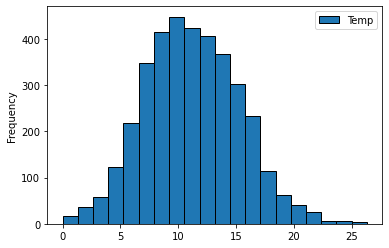

In [14]:
df.plot.hist(edgecolor='k', bins=20)
# Observamos la distribución de las temperaturas
# Parecen tener una distribución normal

<AxesSubplot:xlabel='Date'>

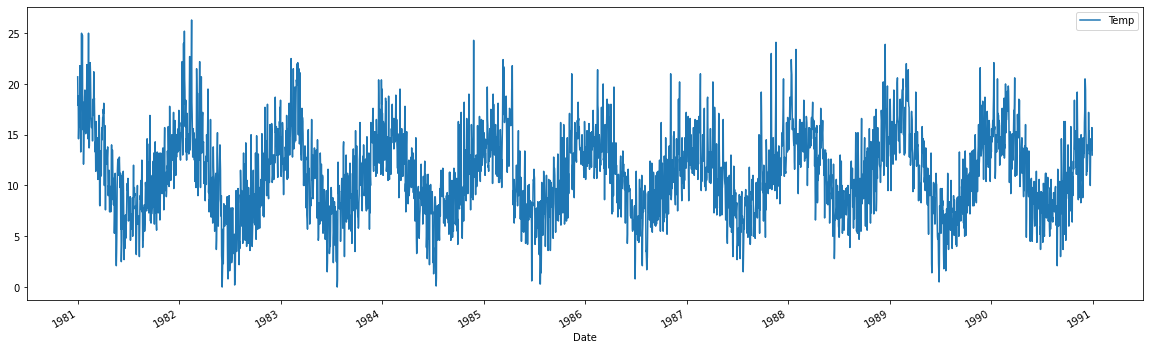

In [15]:
df.plot.line(y='Temp', figsize=(20,6))
# Tiene sentido ver el siguiente patrón 
# dadas las estaciones del año
# invierno baja, verano sube

<AxesSubplot:xlabel='Date'>

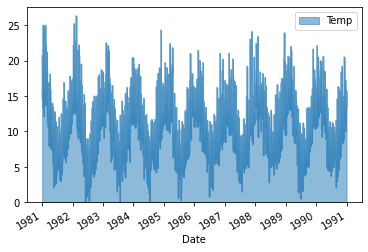

In [16]:
df.plot.area(alpha=0.5)
# Este es similar al anterior sólo que rellena 
# el área de abajo

<AxesSubplot:>

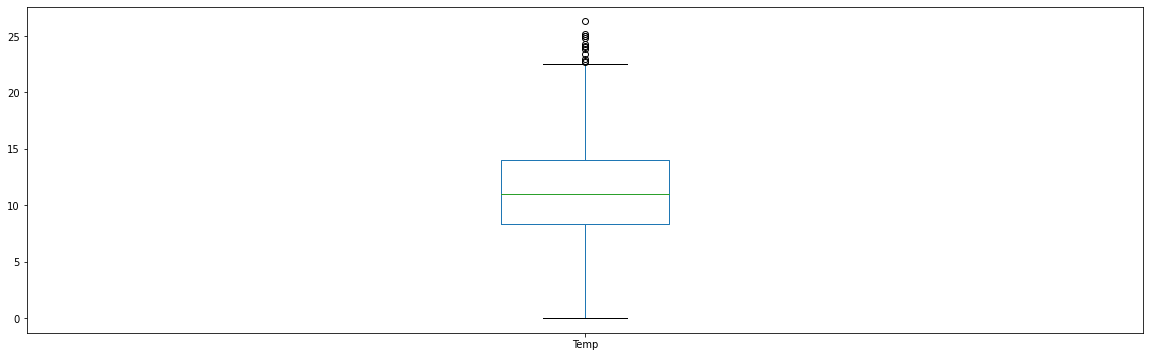

In [17]:
df.plot.box(figsize=(20,6))
# Gráfica de caja, con el máximo y minímo

<AxesSubplot:ylabel='Density'>

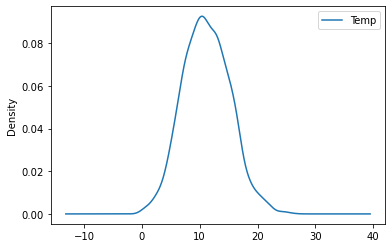

In [18]:
df.plot.kde()

# Agregando columnas

Digamos que ahora queremos añadir la columna "mes"

In [19]:
df.index

DatetimeIndex(['1981-01-01', '1981-01-02', '1981-01-03', '1981-01-04',
               '1981-01-05', '1981-01-06', '1981-01-07', '1981-01-08',
               '1981-01-09', '1981-01-10',
               ...
               '1990-12-22', '1990-12-23', '1990-12-24', '1990-12-25',
               '1990-12-26', '1990-12-27', '1990-12-28', '1990-12-29',
               '1990-12-30', '1990-12-31'],
              dtype='datetime64[ns]', name='Date', length=3650, freq=None)

In [20]:
df.index.month_name()

Index(['January', 'January', 'January', 'January', 'January', 'January',
       'January', 'January', 'January', 'January',
       ...
       'December', 'December', 'December', 'December', 'December', 'December',
       'December', 'December', 'December', 'December'],
      dtype='object', name='Date', length=3650)

In [21]:
df['Mes'] = df.index.month

In [22]:
df.head()

,Temp,Mes
Date,,
1981-01-01,20.7,1
1981-01-02,17.9,1
1981-01-03,18.8,1
1981-01-04,14.6,1
1981-01-05,15.8,1


In [23]:
# agrupamos por mes
por_mes = df.groupby('Mes').mean()

In [24]:
por_mes.sort_index()

,Temp
Mes,
1,15.030323
2,15.373759
3,14.565484
4,12.088333
5,9.866452
6,7.278333
7,6.692581
8,7.891290
9,8.976333


<AxesSubplot:xlabel='Mes'>

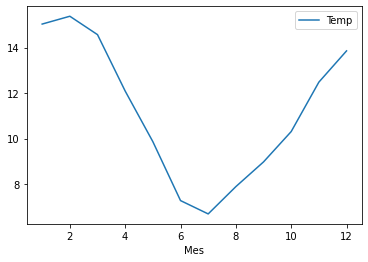

In [25]:
# Si queremos visualizarlo hacemos: 
df.groupby('Mes').mean().plot.line()

In [26]:
df['Año'] = df.index.year

In [27]:
df.head()

,Temp,Mes,Año
Date,,,
1981-01-01,20.7,1,1981
1981-01-02,17.9,1,1981
1981-01-03,18.8,1,1981
1981-01-04,14.6,1,1981
1981-01-05,15.8,1,1981


In [28]:
temp_mensual = df.groupby(['Año', 'Mes']).mean()

<AxesSubplot:xlabel='Año,Mes'>

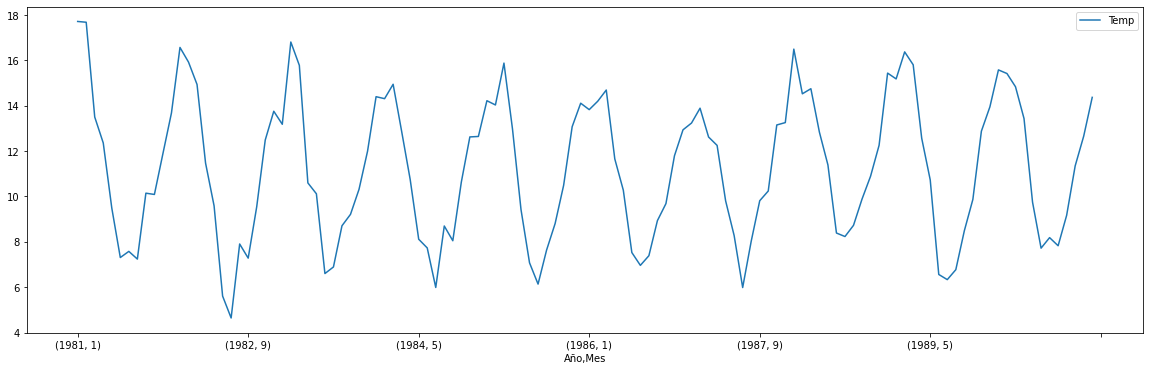

In [29]:
# Si queremos ver la temperatura mensual promedio hacemos:
temp_mensual.plot.line(figsize=(20,6))
# Esta gráfica es similar a la realizada con:
# df.plot.line(y='Temp', figsize=(20,6))
# Pero aquí tenemos menos ruido debido a que 
# estamos usando el promedio

In [30]:
# Si queremos ver la temperatura promedio por año
# hacemos: 
temp_anual = df.groupby(['Año']).mean()

<AxesSubplot:xlabel='Año'>

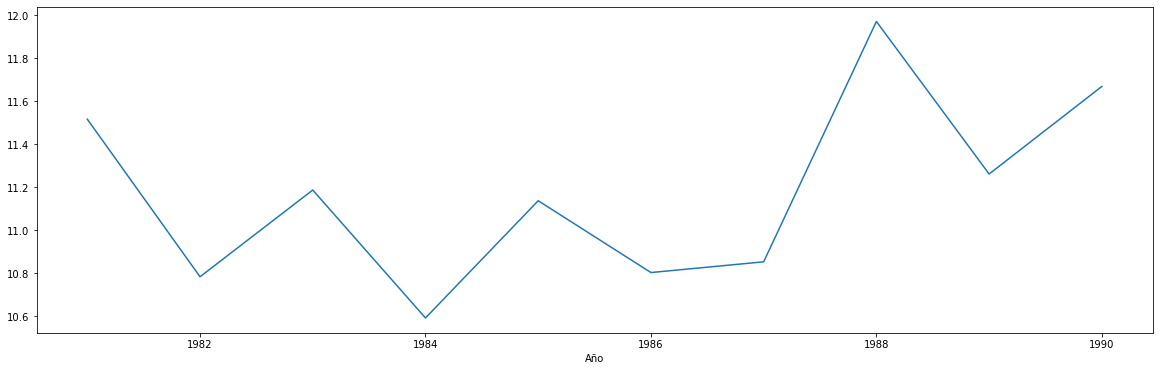

In [31]:
temp_anual['Temp'].plot.line(figsize=(20,6))


* Para categóricas: bar, barh
* Para ver relaciones entre variables: scatter, con s (size) y c (color), alpha, etc.

<h1><a id = "2da"> Primera regla de series de tiempo: Valida con lo <strong>último</strong>, no con aleatorios </a></h1>

In [32]:
df=df.sort_index()

In [33]:
df.head(5)

,Temp,Mes,Año
Date,,,
1981-01-01,20.7,1,1981
1981-01-02,17.9,1,1981
1981-01-03,18.8,1,1981
1981-01-04,14.6,1,1981
1981-01-05,15.8,1,1981


In [34]:
len(df)

3650

In [35]:
train_df = df[:3285]
valid_df = df[3285:]

In [36]:
train_df.head()

,Temp,Mes,Año
Date,,,
1981-01-01,20.7,1,1981
1981-01-02,17.9,1,1981
1981-01-03,18.8,1,1981
1981-01-04,14.6,1,1981
1981-01-05,15.8,1,1981


# Baselines

Lo primero que tenemos que hacer es establecer las baselines. Tenemos dos baselines "estándar" para series de tiempo: 

1. Promedio 
2. Repite última 

A veces funciona mejor una y a veces otra. En el caso de la temperatura: ¿Qué crees que funcione mejor? Para discutir: ¿En qué casos creen que funcione mejor una y en qué casos la otra? 


En el caso de querer predecir la temperatura de mañana, una
cosa que podríamos hacer es decir _"la temperatura de mañana 
va  a ser igual a la de hoy"_ -> **Repite última** 

Otra cosa que podríamos hacer diferente es decir, _"la temperatura de mañana es el promedio de todas las temperaturas anteriores"_ -> **Promedio**


> Antes de modelar debes de establecer las baselines, porque si tu modelo no le gana a las baselines. El modelo no sirve para nada. 


# Repite Última

In [37]:
df.head()

,Temp,Mes,Año
Date,,,
1981-01-01,20.7,1,1981
1981-01-02,17.9,1,1981
1981-01-03,18.8,1,1981
1981-01-04,14.6,1,1981
1981-01-05,15.8,1,1981


In [38]:
df['Temp'].shift(1) # Mueve uno hacia adelante a mis datos

Date
1981-01-01     NaN
1981-01-02    20.7
1981-01-03    17.9
1981-01-04    18.8
1981-01-05    14.6
              ... 
1990-12-27    14.6
1990-12-28    14.0
1990-12-29    13.6
1990-12-30    13.5
1990-12-31    15.7
Name: Temp, Length: 3650, dtype: float64

In [39]:
df['ultima_temp'] = df['Temp'].shift(1)

In [40]:
df.head()

,Temp,Mes,Año,ultima_temp
Date,,,,
1981-01-01,20.7,1,1981,NaN
1981-01-02,17.9,1,1981,20.7
1981-01-03,18.8,1,1981,17.9
1981-01-04,14.6,1,1981,18.8
1981-01-05,15.8,1,1981,14.6


<AxesSubplot:xlabel='ultima_temp', ylabel='Temp'>

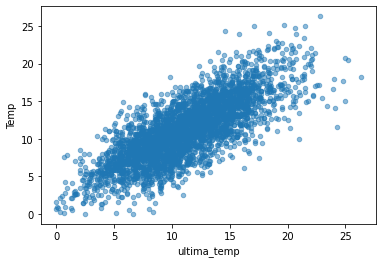

In [41]:
df.plot.scatter(x='ultima_temp', y = 'Temp', alpha=0.5)

<AxesSubplot:xlabel='Date'>

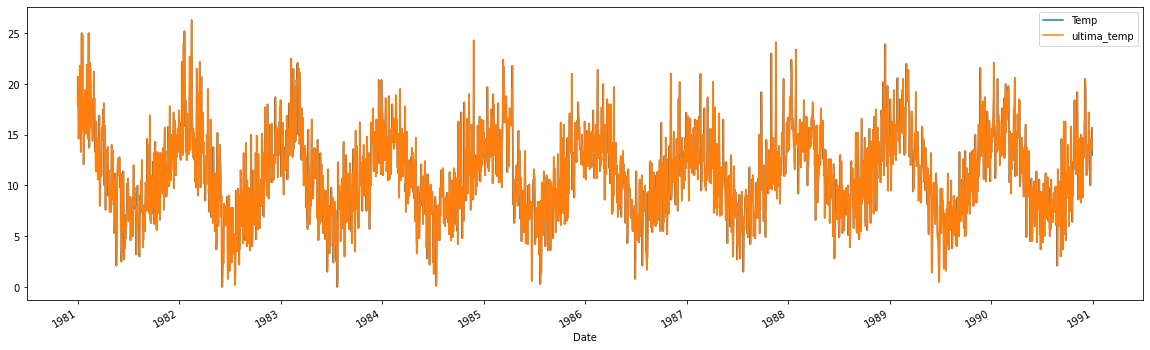

In [42]:
df[['Temp', 'ultima_temp']].plot.line(figsize=(20,6))

<AxesSubplot:xlabel='Date'>

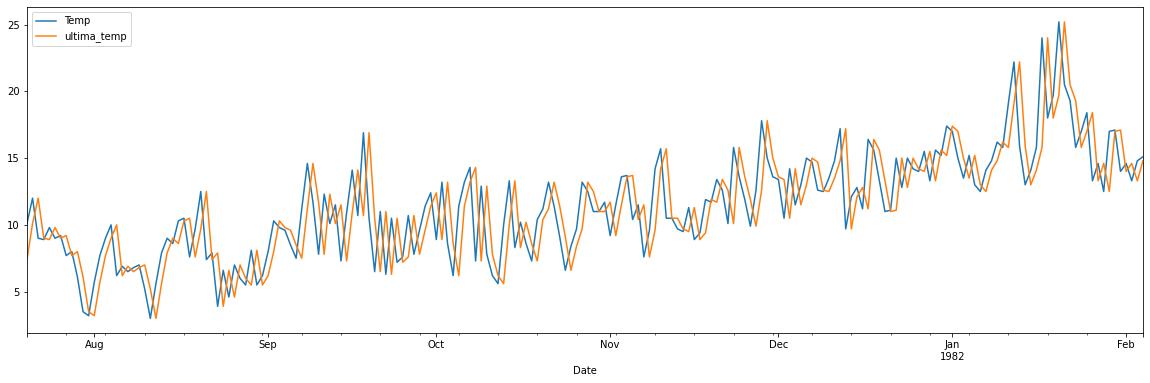

In [43]:
df[['Temp', 'ultima_temp']][200:400].plot.line(figsize=(20,6))

> Como se observa, se "enciman" -> la última temperatura y la anterior son las mismas. 

Esta podría ser una buena manera de corroborar que estas trabajando con la baseline correcta. 

In [44]:
valid_df = df[3285:]

In [45]:
# Calculamos el error
error_ultima = np.mean(np.abs(valid_df['Temp'] - valid_df['ultima_temp']))
error_ultima

2.024931506849315

In [46]:
def error_l1(df, colA, colB, init_step): 
    """Función para calcular el error l1
    """
    valid_df = df[init_step:]
    return np.mean(np.abs(valid_df[colA] - valid_df[colB]))

In [47]:
error_l1(df, 'Temp', 'ultima_temp', 3285)

2.024931506849315

In [48]:
def error_rmse(df, colA, colB, init_step): 
    """Función para calcular el error rmse
    """
    valid_df = df[init_step:]
    return np.sqrt(np.mean(np.square(valid_df[colA] - valid_df[colB])))

In [49]:
error_rmse(df, 'Temp', 'ultima_temp', 3285)

2.5824009217292243

# Promedio

En cada medición quiero encontrar el promedio de todo lo anterior. Para esto vamos a usar el método _expanding_ en pandas


In [50]:
df['Temp'].expanding()
# Lo va a hacer cumulativo

Expanding [min_periods=1,center=False,axis=0]

In [51]:
df['Temp']

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
              ... 
1990-12-27    14.0
1990-12-28    13.6
1990-12-29    13.5
1990-12-30    15.7
1990-12-31    13.0
Name: Temp, Length: 3650, dtype: float64

In [52]:
df['Temp'].expanding().mean()
# o sea, al poner mean. Me va a dar el promedio 
# hasta cada punto (observa la linea anterior)

# En este caso, al final el promedio se queda muy 
# constante

Date
1981-01-01    20.700000
1981-01-02    19.300000
1981-01-03    19.133333
1981-01-04    18.000000
1981-01-05    17.560000
                ...    
1990-12-27    11.174712
1990-12-28    11.175377
1990-12-29    11.176014
1990-12-30    11.177254
1990-12-31    11.177753
Name: Temp, Length: 3650, dtype: float64

In [53]:
df

,Temp,Mes,Año,ultima_temp
Date,,,,
1981-01-01,20.7,1,1981,NaN
1981-01-02,17.9,1,1981,20.7
1981-01-03,18.8,1,1981,17.9
1981-01-04,14.6,1,1981,18.8
1981-01-05,15.8,1,1981,14.6
...,...,...,...,...
1990-12-27,14.0,12,1990,14.6
1990-12-28,13.6,12,1990,14.0
1990-12-29,13.5,12,1990,13.6


Quiero el promedio de lo anterior, o sea, si quieres predecir algo
no quieres usar ese promedio (sería como hacer trampa) sino el promedio de todo lo anterior
para poder predecir el futuro, entonces hacemos: 

In [54]:
df['promedio_temp'] = df['Temp'].expanding().mean().shift(1)

In [55]:
df

,Temp,Mes,Año,ultima_temp,promedio_temp
Date,,,,,
1981-01-01,20.7,1,1981,NaN,NaN
1981-01-02,17.9,1,1981,20.7,20.700000
1981-01-03,18.8,1,1981,17.9,19.300000
1981-01-04,14.6,1,1981,18.8,19.133333
1981-01-05,15.8,1,1981,14.6,18.000000
...,...,...,...,...,...
1990-12-27,14.0,12,1990,14.6,11.173937
1990-12-28,13.6,12,1990,14.0,11.174712
1990-12-29,13.5,12,1990,13.6,11.175377


<AxesSubplot:xlabel='Date'>

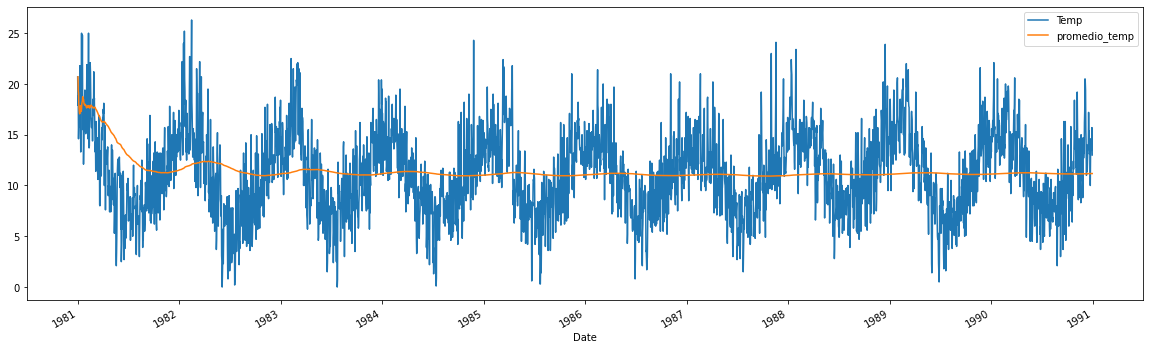

In [56]:
df[['Temp', 'promedio_temp']].plot.line(figsize=(20,6))

In [57]:
error_l1(df, 'promedio_temp', 'Temp', 3285)

3.2301969509798254

In [58]:
error_rmse(df, 'promedio_temp', 'Temp', 3285)

3.8915659620656644

# Moving average

En la misma linea de pensar "baselines" de qué hacer. 

Imagina que tienes una cantidad que va creciendo constantemente poco a poco pero con ruido (e.g. temperatura, economía, acciones de alguna empresa). Si tomamos el promedio de TODO lo anterior. No va a funcionar bien, porque el promedio siempre será más chico que el real. Las temperaturas más recuentes son más indicativas de qué está pasando, pero si siempre adivinamos la última, tendríamos mucho ruido. 


> Lo que vamos a hacer, inicialmente, es no tomar nada más el último, sino el promedio de los últimos k (con k = 5 o algún número pequeño)

In [59]:
df['promedio_ultimas_2'] = df['Temp'].rolling(2).mean().shift(1)
df['promedio_ultimas_3'] = df['Temp'].rolling(3).mean().shift(1)
df['promedio_ultimas_4'] = df['Temp'].rolling(4).mean().shift(1)
df['promedio_ultimas_5'] = df['Temp'].rolling(5).mean().shift(1)
df['promedio_ultimas_50'] = df['Temp'].rolling(50).mean().shift(1)
# Rolling es parecida a expanding, solo que en rolling tú le dices
# hasta cual llegar

In [60]:
df

,Temp,Mes,Año,ultima_temp,promedio_temp,promedio_ultimas_2,promedio_ultimas_3,promedio_ultimas_4,promedio_ultimas_5,promedio_ultimas_50
Date,,,,,,,,,,
1981-01-01,20.7,1,1981,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981-01-02,17.9,1,1981,20.7,20.700000,NaN,NaN,NaN,NaN,NaN
1981-01-03,18.8,1,1981,17.9,19.300000,19.30,NaN,NaN,NaN,NaN
1981-01-04,14.6,1,1981,18.8,19.133333,18.35,19.133333,NaN,NaN,NaN
1981-01-05,15.8,1,1981,14.6,18.000000,16.70,17.100000,18.000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1990-12-27,14.0,12,1990,14.6,11.173937,13.75,12.500000,12.850,12.92,13.464
1990-12-28,13.6,12,1990,14.0,11.174712,14.30,13.833333,12.875,13.08,13.360
1990-12-29,13.5,12,1990,13.6,11.175377,13.80,14.066667,13.775,13.02,13.324


In [61]:
[error_l1(df, 'Temp', f'promedio_ultimas_{i}', 3285) for i in range(2, 6)]

[2.092465753424656, 2.132054794520549, 2.0824657534246565, 2.0526575342465767]

In [62]:
[error_rmse(df, 'Temp', f'promedio_ultimas_{i}', 3285) for i in range(2, 6)]

[2.712819642172864, 2.7478022212641458, 2.702982877925083, 2.661988750838185]

<AxesSubplot:xlabel='Date'>

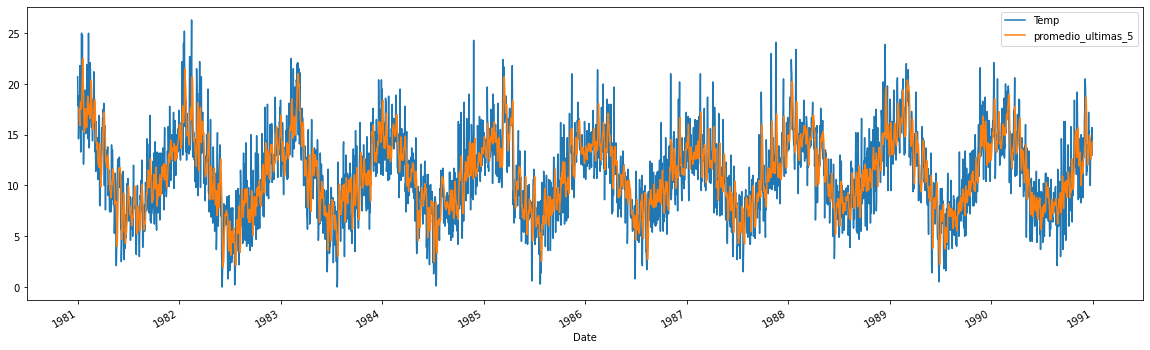

In [63]:
df[['Temp', 'promedio_ultimas_5']].plot.line(figsize=(20,6))

# Seasonality, Trend

En realidad muchos datos tienen una componente de "seasonality", o periodicidad y también una "trend" o "tendencia". Hay muchas maneras de separar en estas dos componentes. 

# Filtro de Hodrick-Prescott

La idea es separar la señal en dos componentes así: 

$$
y_{t} = \tau_{t} + c_{t}
$$

donde $\tau$ denota la tendecia y $c$ la componente ciclica. Los encontramos minimizando lo siguiente: 

$$
min_{\tau_{t}} \sum c_{t}^{2} + \lambda \sum [(\tau_{t} - \tau_{t-1}) - (\tau_{t-1} - \tau_{t-2})]
$$

donde $\lambda$ es un parámetro de suavizado que se puede escoger. Usualmente se pone dependiendo del periodo de repetición (luego veremos otros métodos que lo escoge automáticamente). Por ejemplo $\lambda = 6.25$ para datos anuales (como el que tenemos)



In [64]:
import statsmodels as sm
from statsmodels.tsa.filters.hp_filter import hpfilter

In [65]:
hpfilter??

In [66]:
# hpfilter me regresa dos cosas: el trend y el cycle
temp_trend, temp_cycle = hpfilter(df['Temp'], lamb=6.25)

In [67]:
df['temp_cycle'] = temp_cycle
df['temp_trend'] = temp_trend

<AxesSubplot:xlabel='Date'>

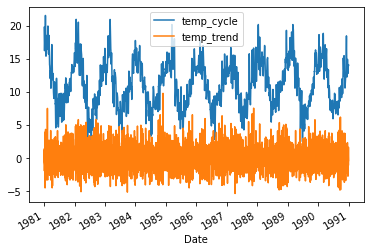

In [68]:
# Graficando estas dos cosas tenemos: 
df[['temp_cycle', 'temp_trend']].plot()

<AxesSubplot:xlabel='Date'>

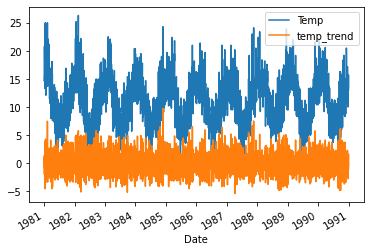

In [69]:
df[['Temp', 'temp_trend']].plot()

Vamos a repetir este análisis pero con el archivo "macrodata.csv" que contiene datos macroeconómicos de estados unidos

In [70]:
d = pd.read_csv('/notebooks/storage/mydata/macrodata.csv')

In [71]:
d.head(5)

,Unnamed: 0,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,3/31/1959,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,6/30/1959,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,9/30/1959,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,12/31/1959,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,3/31/1960,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


<AxesSubplot:>

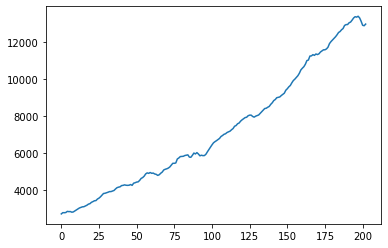

In [72]:
d['realgdp'].plot()

In [73]:
realgdp_cycle, realgdp_trend = hpfilter(d['realgdp'], lamb=6.25)

In [74]:
d['realgdp_cycle'] = realgdp_cycle
d['realgdp_trend'] = realgdp_trend

<AxesSubplot:>

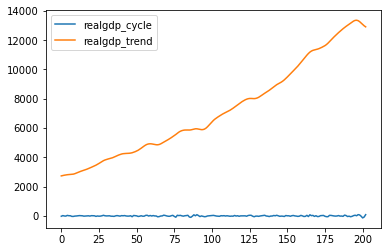

In [75]:
d[['realgdp_cycle', 'realgdp_trend']].plot()

# Modelos ETS: Error, Trend, Seasonality

Los modelos ETS son una familia de modelos para series de tiempo que separa las señales de Error (E), Tendencias (T) y Estacional (S = seasonality)

In [76]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [77]:
result = seasonal_decompose(df['Temp'], period = 365)

In [78]:
import pylab

In [79]:
# para ahcer la imagen más grande
pylab.rcParams['figure.figsize'] = (20.0, 10.0)

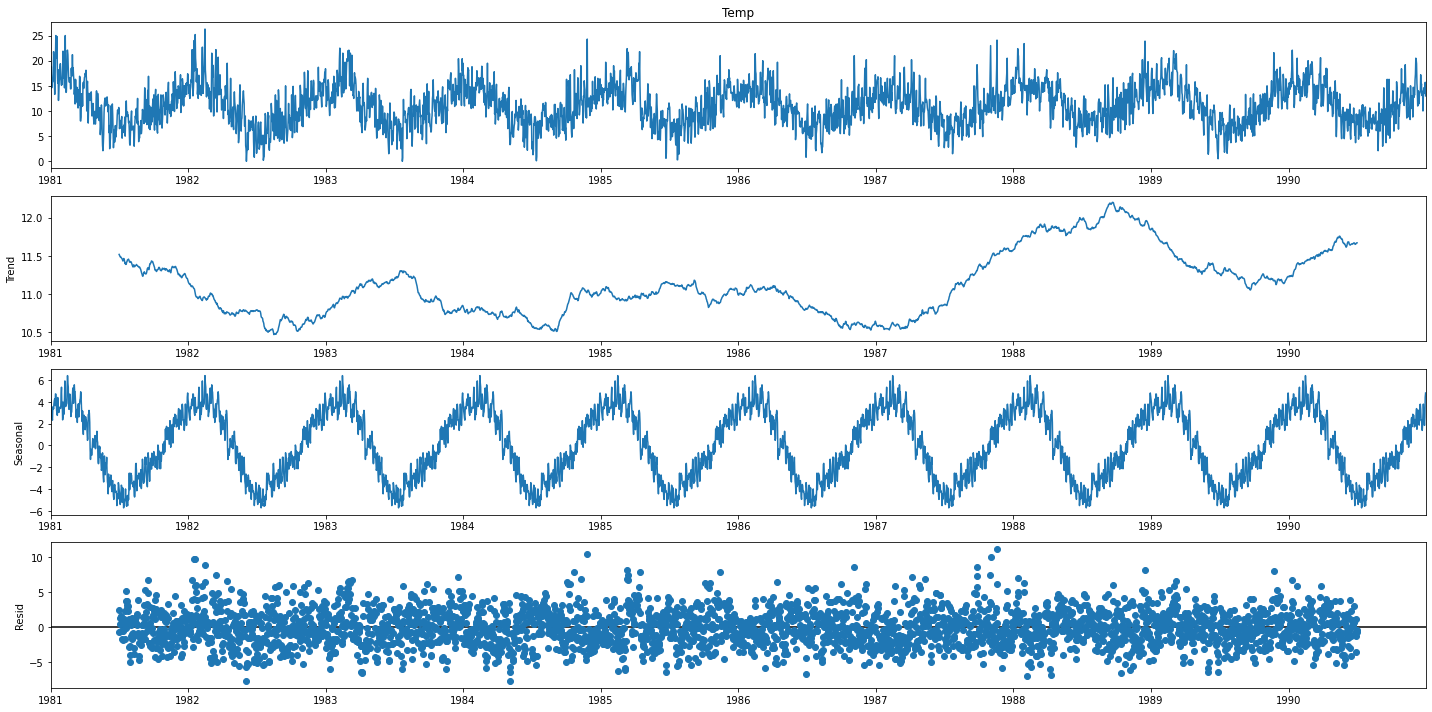

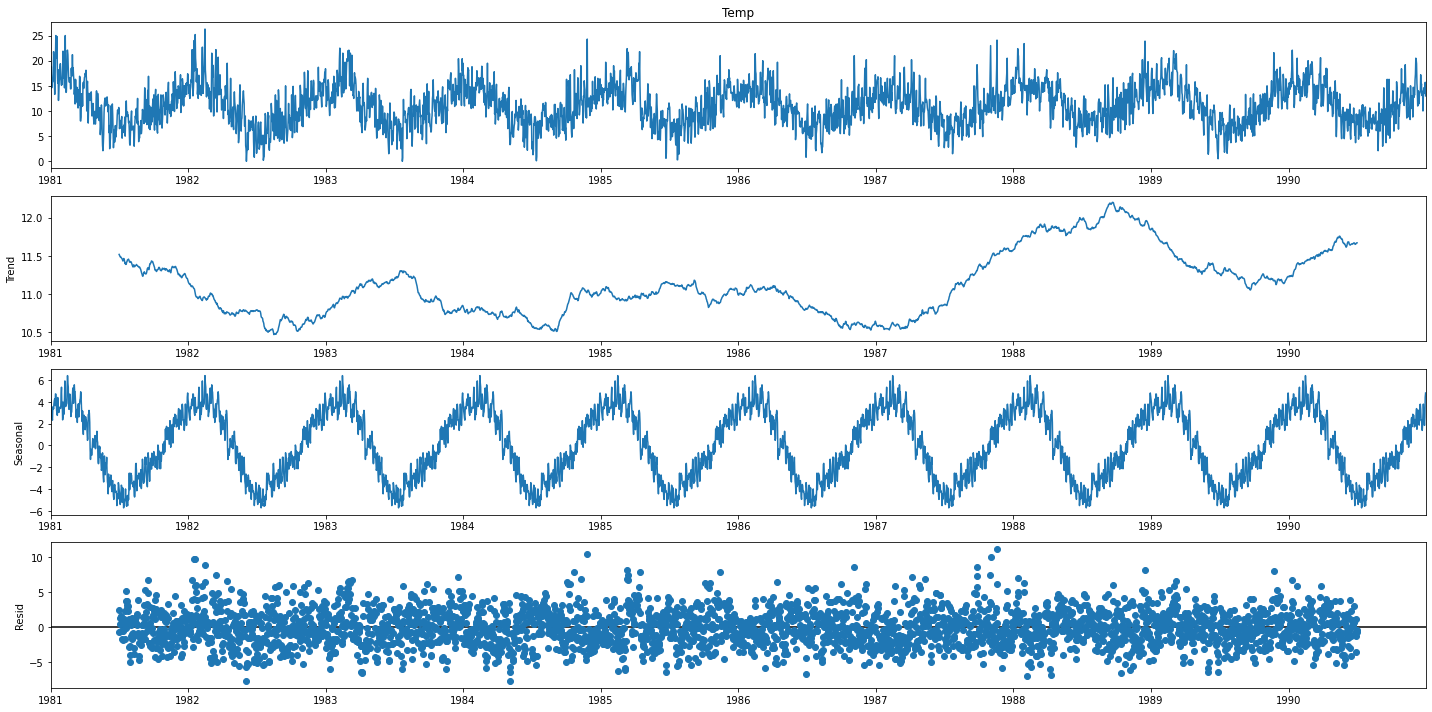

In [80]:
result.plot()

# Exponentially weighted moving average

Algo que muchas veces expresa el promedio bien, es calcular el "exponentially weighted moving average": Importan todos los términos anteriores pero cada uno vale un poco menos. Por ejemplo, si los términos de la sucesión son 

$x_{0}, x_{1},...,x_{n}$ y nosotros adivinamos $y_{0}, y_{1},...,y_{n}$ podríamos calcular así: 

$$
y_{n} = \frac{\alpha x_{n-1}+\alpha^{2}x_{n-2}+...+\alpha^{n}x_{0}}{\alpha+\alpha^{2}+...+\alpha^{n}}
$$

Es decir, estamos haciendo un **promedio pesado** (un promedio con EWMA) en donde a cada uno le damos un peso más y más chico que decae exponencialmente. Otra manera de verlo (mucho más sencilla) es así: 

$$y_{1} = x_{0}$$
$$y_{n} = \alpha x_{n-1} + (1-\alpha)y_{n-1}$$

Es decir, para calcular el siguiente término, llevamos "la cuenta" y el siguiente término lo calculamos como: $\alpha * \text{el nuevo término} + (1-\alpha) * \text{lo que ya llevábamos}$ 

In [81]:
def ewma(L, alpha=0.1):
    #valor = Yn
    #l = Xn-1
    valor = L[0]
    resultado = [valor]
    for l in L[1:]:
        valor = alpha*l+(1-alpha)*valor
        resultado.append(valor)
        
    return resultado

In [82]:
df['temp_ewma'] = ewma(df['Temp'], alpha = 0.05)

In [84]:
df.head(5)

,Temp,Mes,Año,ultima_temp,promedio_temp,promedio_ultimas_2,promedio_ultimas_3,promedio_ultimas_4,promedio_ultimas_5,promedio_ultimas_50,temp_cycle,temp_trend,temp_ewma
Date,,,,,,,,,,,,,
1981-01-01,20.7,1,1981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.725285,0.974715,20.70000
1981-01-02,17.9,1,1981,20.7,20.700000,NaN,NaN,NaN,NaN,NaN,18.496715,-0.596715,20.56000
1981-01-03,18.8,1,1981,17.9,19.300000,19.30,NaN,NaN,NaN,NaN,17.424099,1.375901,20.47200
1981-01-04,14.6,1,1981,18.8,19.133333,18.35,19.133333,NaN,NaN,NaN,16.567919,-1.967919,20.17840
1981-01-05,15.8,1,1981,14.6,18.000000,16.70,17.100000,18.0,NaN,NaN,16.208797,-0.408797,19.95948


<AxesSubplot:xlabel='Date'>

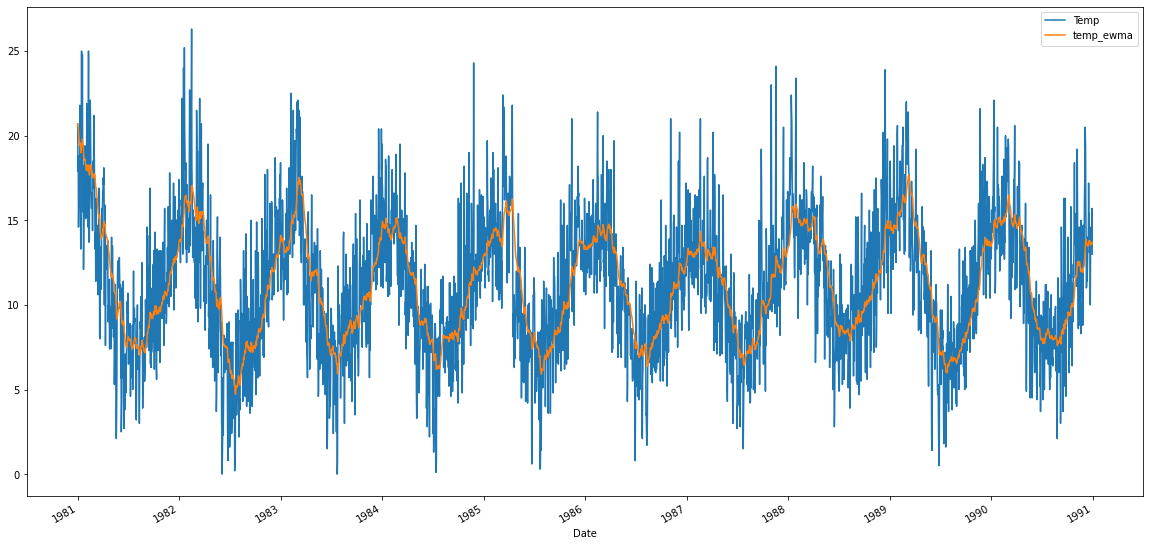

In [85]:
df[['Temp', 'temp_ewma']].plot()

In [86]:
df['temp_ewma'] = ewma(df['Temp'], alpha = 0.3)
df['temp_ewma'] = df['temp_ewma'].shift(1)

In [87]:
error_l1(df, 'Temp', 'temp_ewma', 3285)

1.9018132743417109

In [88]:
error_rmse(df, 'Temp', 'temp_ewma', 3285)

2.4913234051617077

# EWMA en pandas

In [97]:
df['EWMA'] = df['Temp'].ewm(alpha=0.5).mean()
# alpha debe ser un número entre 0 y 1

<AxesSubplot:xlabel='Date'>

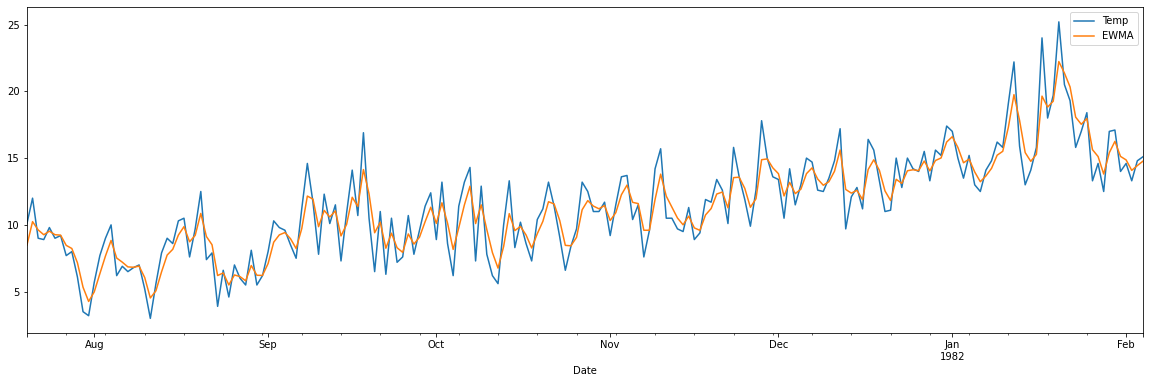

In [99]:
df[['Temp', 'EWMA']][200:400].plot(figsize=(20,6))
# Si el alpha es más grande, captura más el ruido en la serie 
# Si es más pequeño, parece ser el promedio

Hay varias maneras de entender los parámetros de ewm, pero lo que hace es calcular alpha. Por ejemplo, podemos definir la vida media. 

# Método de Holt-Winters

¿Cuál es el problema de EWMA? Imaginemos que los valores fueran creciendo constantemente. Sería razonable pensar que seguirá creciendo. EWMA siempre predice más pequeños que el último, porque es simplemente un promedio pesado. Vamos entonces a usar una componente de "tendencia" $b_{t}$, en donde simplemente mediremos qué tanto van creciendo o disminuyendo los valores _(método de Holt)_. <- **Método de Holt**

Posteriormente le agregaremos una componente de "periodicidad" $s_{t}$ (seasonality), en donde tomaremos en cuenta los valores del periodo anterior par amodelar los ciclos que vemos. 

En resumen, usamos 3 componentes: 

1. $\ell_{t}$ para el "nivel" (EWMA básicamente) 
2. $b_{t}$ para la tendencia
3. $s_{t}$ para la periodicidad 

Cada uno tendrá su parámentro de suavizado: $\alpha, \beta, \gamma$

> Vamos a hacer un EWMA para los tres, de ahí que cada uno tenga su parámetro de suavizado

Primero veremos una versión más sencilla, el método de Holt, donde solo tomamos en cuenta $\ell$ y $b$.

# Método de Holt 

En EWMA teníamos: 

$$y_{1} = x_{0}$$
$$y_{n} = \alpha x_{n-1} + (1-\alpha)y_{n-1}$$

Para tomar en cuenta la tendencía, debemos medir cómo va cambiando el nivel en cada medición y tomaremos el promedio de éstos: 

$$\ell_{t} = (1 - \alpha)\ell_{t-1} + \alpha x_{t}$$
$$b_{t} = (1 - \beta)b_{t-1} + \beta(\ell_{t} - \ell_{t-1})$$
$$y_{t} = \ell_{t} + b_{t}$$

> $\ell_{t}$ es lo que antes era $y$

> en $b_{t}$ (tendecia) estamos comparando los niveles contra los anteriores para ver como va cambiando entre cada tiempo y el siguiente tiempo. Y tomamos un promedio pesado, un promedio con EWMA, tenemos que hacer lo que dicta la formula. 


In [102]:
def holt(X, alpha, beta):
    # X = serie
    n = len(X)
    L = [X[0]]
    B = [0]
    Y = [X[0]]
    for i in range(1, n): 
        li = alpha*X[i] + (1-alpha)*L[i-1]
        L.append(li)
        bi = (1-beta)*B[-1] + beta*(L[i] - L[i-1])
        B.append(bi)
        yi = li + bi
        Y.append(yi)
        
    return (Y)

In [103]:
df['Holt_temp'] = holt(df['Temp'], 0.1, 0.2)

<AxesSubplot:xlabel='Date'>

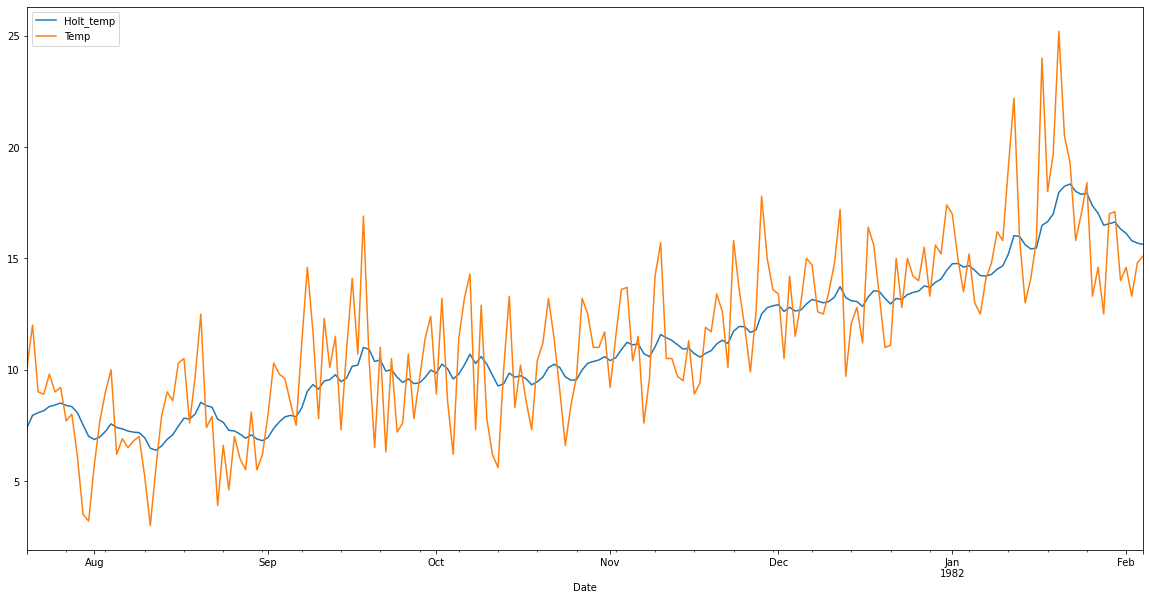

In [104]:
df[['Holt_temp', 'Temp']][200:400].plot()

Ejercicios: 

1. Jugar con los parámetros $\alpha$, $\beta$
2. Pregunta: Si quisiéramos predecir qué pasa en 10 (o 20) tiempos... ¿qué predecimos? 

> my_answer = Predecimos algo similar, dado que si hay cierta tendencía, a menos que haya un cisne negro o algo que heche por borda toda la tendencía, la tendencía debería mantenerse. 

> teacher_answer = Vamos a pensar que la tendencía continua.
$$
y_{t+k} \approx y_{t} + k*b_{t}
$$
si cada vez esta subiendo más o menos el nivel en $b_{t}$, entonces, en $k$ tiempos va a subir $k$ veces el nivel $b_{t}$